In [ ]:
# Capstone project using only Python(Pandas, Seaborm) 
# Exploratory Data Analysis of Diwali festival sales
# Objective: Improve customer experience by analysing sales data and increase revenue. 

In [4]:
import pandas as pd

In [21]:
import seaborn as sns

In [6]:
# Import CSV file
df= pd.read_csv('Diwali Sales Data.csv', encoding= 'unicode_escape')

In [7]:
# Shape of file ( Rows & Column )
df.shape

(11251, 14)

In [8]:
# Top 5 rows of the Data 
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,Unnamed
0,1002903,Sanskriti,P00125942,F,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [9]:
# To check Null values and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age               11251 non-null  int64  
 5   Marital_Status    11251 non-null  int64  
 6   State             11251 non-null  object 
 7   Zone              11251 non-null  object 
 8   Occupation        11251 non-null  object 
 9   Product_Category  11251 non-null  object 
 10  Orders            11251 non-null  int64  
 11  Amount            11239 non-null  float64
 12  Status            0 non-null      float64
 13  Unnamed           0 non-null      float64
dtypes: float64(3), int64(4), object(7)
memory usage: 1.2+ MB


In [9]:
# Deleting or Dropping unrelated / blank columns
df.drop(['Status','Unnamed'], axis=1, inplace=True) 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age               11251 non-null  int64  
 5   Marital_Status    11251 non-null  int64  
 6   State             11251 non-null  object 
 7   Zone              11251 non-null  object 
 8   Occupation        11251 non-null  object 
 9   Product_Category  11251 non-null  object 
 10  Orders            11251 non-null  int64  
 11  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(7)
memory usage: 1.0+ MB


In [11]:
# Check for Null values 
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [ ]:
# There are 12 rows in the 'Amount' section which have null values, Either we can delete those or fill with median value

In [12]:
# Filter rows with atleast One null value
rows_with_null = df[df.isnull().any(axis=1)]

print("Rows with Null Values: ")
print(rows_with_null)


Rows with Null Values: 
     User_ID Cust_name Product_ID Gender  Age  Marital_Status           State  \
7    1002092  Shivangi  P00273442      F   61               0     Maharashtra   
14   1003858      Cano  P00293742      M   46               1  Madhya Pradesh   
16   1005447       Amy  P00275642      F   48               1  Andhra Pradesh   
109  1005265    Sakshi  P00296242      F   48               1           Delhi   
111  1005261   Apoorva  P00057942      F   41               1           Delhi   
184  1005538    Kartik  P00269542      F   49               1       Karnataka   
293  1000326  Jonathan  P00120542      M   53               0         Gujarat   
344  1002507   Lakshmi  P00045842      F   35               1         Gujarat   
345  1004498   Srishti  P00030842      F   55               0           Delhi   
452  1004601    Gaurav  P00014442      F   40               1  Madhya Pradesh   
464  1004528    Anurag  P00338442      F   33               1   Uttar Pradesh   
493 

In [13]:
# Calculate mean for each category & fill NA with Median value for that category.
df['Amount']= df.groupby('Product_Category')['Amount'].transform(lambda x: x.fillna(x.mean()))

In [14]:
# Check weather changes have been done or not
selected_rows = df[(df['User_ID'] == 1002507) & (df['Product_ID'] == 'P00045842')]
print(selected_rows)

     User_ID Cust_name Product_ID Gender  Age  Marital_Status    State  \
344  1002507   Lakshmi  P00045842      F   35               1  Gujarat   

        Zone Occupation Product_Category  Orders        Amount  
344  Western   Chemical        Furniture       1  15454.693153  


In [15]:
pd.isnull(df).sum()  # Now no values

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [16]:
# Changing Data type ( Float to Integer)
df['Amount'] = df['Amount'].astype('int')

In [17]:
# Checking Data type of perticuler column
df['Amount'].dtypes

dtype('int32')

In [18]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age', 'Marital_Status',
       'State', 'Zone', 'Occupation', 'Product_Category', 'Orders', 'Amount'],
      dtype='object')

In [22]:
# Renaming column
df.rename(columns={'Marital_Status':'Married'})

,User_ID,Cust_name,Product_ID,Gender,Age,Married,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [23]:
# 'describe()' method returns discription of the data in the Dataframe.(Count, Mean, Std, etc)
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11251.000000
mean,1.003004e+06,35.421207,0.420318,2.489290,9460.454626
std,1.716125e+03,12.754122,0.493632,1.115047,5224.434220
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.500000
50%,1.003065e+06,33.000000,0.000000,2.000000,8110.000000
75%,1.004430e+06,43.000000,1.000000,3.000000,12691.500000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [28]:
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11251.000000,11251.000000,11251.000000
mean,35.421207,2.489290,9460.454626
std,12.754122,1.115047,5224.434220
min,12.000000,1.000000,188.000000
25%,27.000000,1.500000,5443.500000
50%,33.000000,2.000000,8110.000000
75%,43.000000,3.000000,12691.500000
max,92.000000,4.000000,23952.000000


In [20]:
# Defining a function to categorize age
def categorize_age(age):
    if age <= 17:
        return '0-17'
    elif age <= 25:
        return '18-25'
    elif age <= 35:
        return '26-35'
    elif age <= 45:
        return '36-45'
    elif age <= 55:
        return '46-55'
    else:
        return '55+'

# Function to create a new column 'Age_Group'.
df['Age_Group'] = df['Age'].apply(categorize_age)
print(df)

       User_ID    Cust_name Product_ID Gender  Age  Marital_Status  \
0      1002903    Sanskriti  P00125942      F   28               0   
1      1000732       Kartik  P00110942      F   35               1   
2      1001990        Bindu  P00118542      F   35               1   
3      1001425       Sudevi  P00237842      M   16               0   
4      1000588         Joni  P00057942      M   28               1   
...        ...          ...        ...    ...  ...             ...   
11246  1000695      Manning  P00296942      M   19               1   
11247  1004089  Reichenbach  P00171342      M   33               0   
11248  1001209        Oshin  P00201342      F   40               0   
11249  1004023       Noonan  P00059442      M   37               0   
11250  1002744      Brumley  P00281742      F   19               0   

                State      Zone       Occupation Product_Category  Orders  \
0         Maharashtra   Western       Healthcare             Auto       1   
1    

EDA = Exploratory Data Analysis

Gender

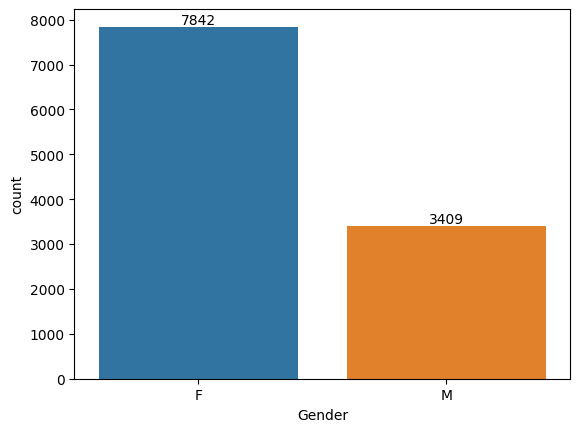

In [22]:
# Plotting a bar chart for Gender & it's count.

ax = sns.countplot(x = 'Gender', data = df)

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

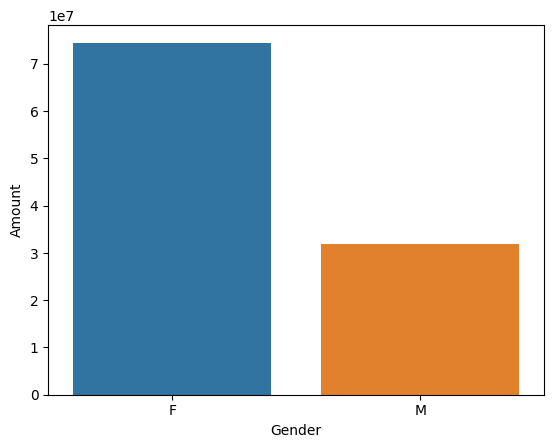

In [27]:
# Plotting bar chart for Gender vs Total amount

sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x='Gender', y='Amount', data= sales_gen)

From above graphs we can see that most of the buyers are Females & even the purchasing power of Females are greater then Men.

AGE_GROUP

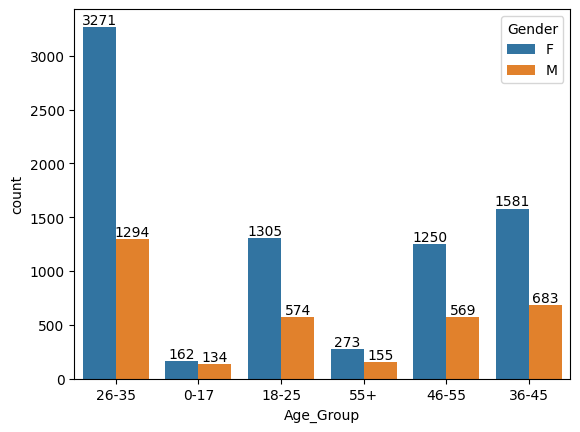

In [29]:
ax = sns.countplot(data= df, x= 'Age_Group', hue= 'Gender') 
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age_Group', ylabel='Amount'>

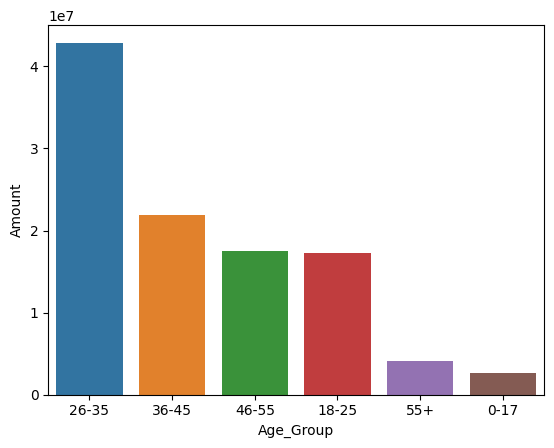

In [31]:
# Total Amount vs Age Group
sales_age = df.groupby(['Age_Group'], as_index= False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x= 'Age_Group', y= 'Amount', data= sales_age)

From above graphs we can see that most of the buyers are of age group 26-35 years feamles. 

State

<Axes: xlabel='State', ylabel='Orders'>

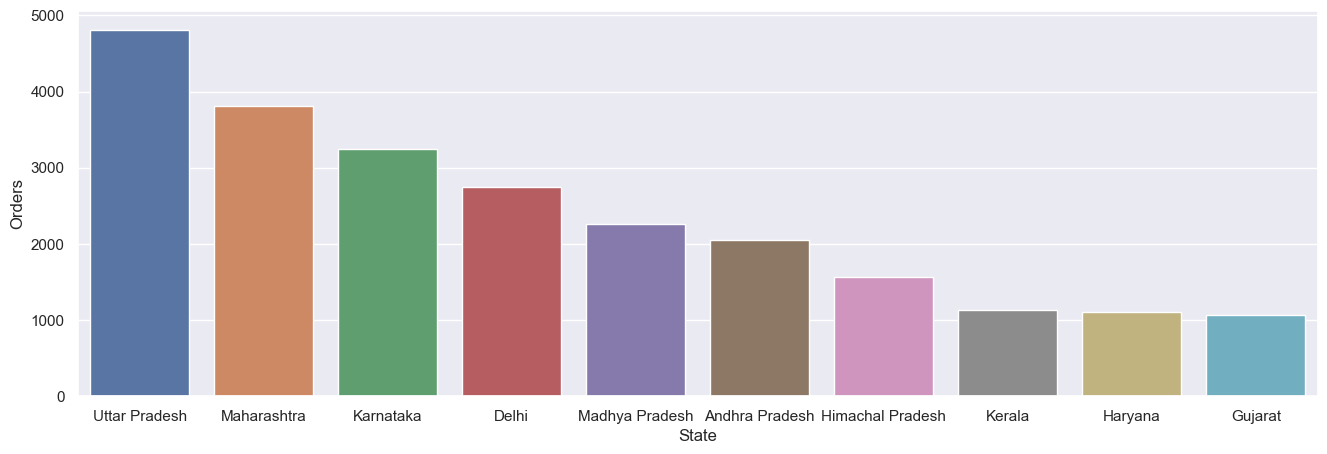

In [35]:
# Total numbers of Orders from top 10 states

sales_state= df.groupby(['State'], as_index= False)['Orders'].sum().sort_values(by= 'Orders', ascending= False).head(10)

sns.set(rc={'figure.figsize':(16,5)})
sns.barplot(data= sales_state, x= 'State', y='Orders')

<Axes: xlabel='State', ylabel='Amount'>

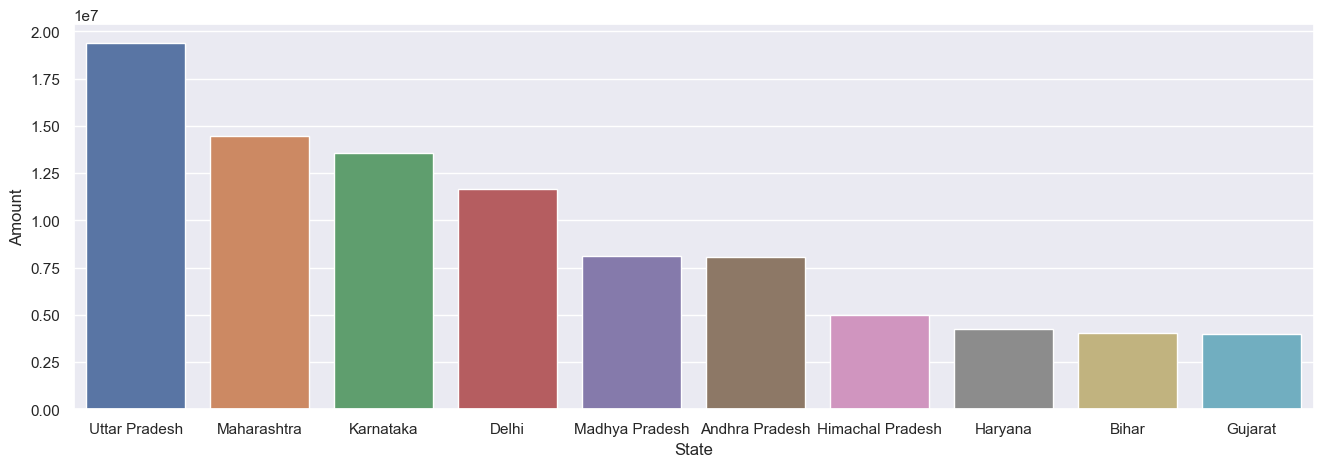

In [37]:
sales_state= df.groupby(['State'], as_index= False)['Amount'].sum().sort_values(by= 'Amount', ascending= False).head(10)

sns.set(rc={'figure.figsize':(16,5)})
sns.barplot(data= sales_state, x= 'State', y='Amount')

From the above graphs we can see that most of the Orders & total sales Amount are from Uttar Pradesh, Maharashtra & Karnataka respectively.

In [ ]:
MARITAL STATUS

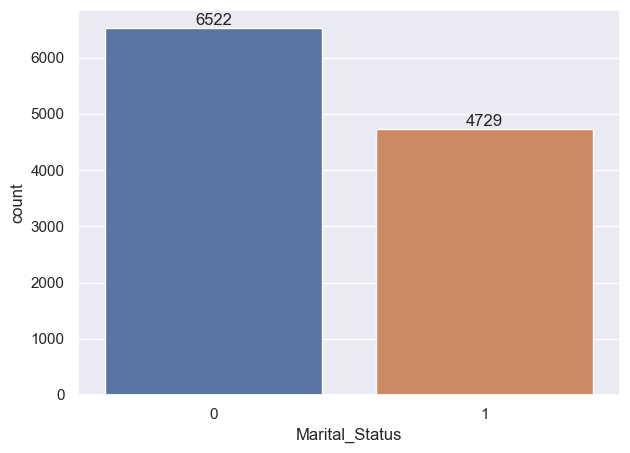

In [42]:
ax = sns.countplot(data= df, x= 'Marital_Status')

sns.set(rc={'figure.figsize':(7,5)})
for bars in ax.containers:
    ax.bar_label(bars)

0 = Not Married &   1 = Married

<Axes: xlabel='Marital_Status', ylabel='Amount'>

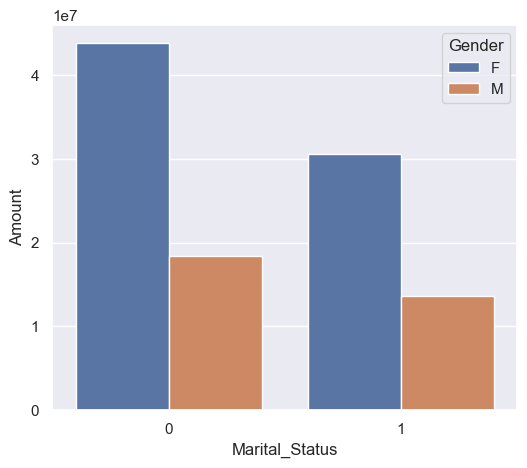

In [43]:
sales_state= df.groupby(['Marital_Status', 'Gender'], as_index= False)['Amount'].sum().sort_values(by= 'Amount', ascending= False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data= sales_state, x= 'Marital_Status', y='Amount', hue= 'Gender')

From the above graphs we can say that most of the buyers are unmarried females. In married also females are higher in number.

OCCUPATION

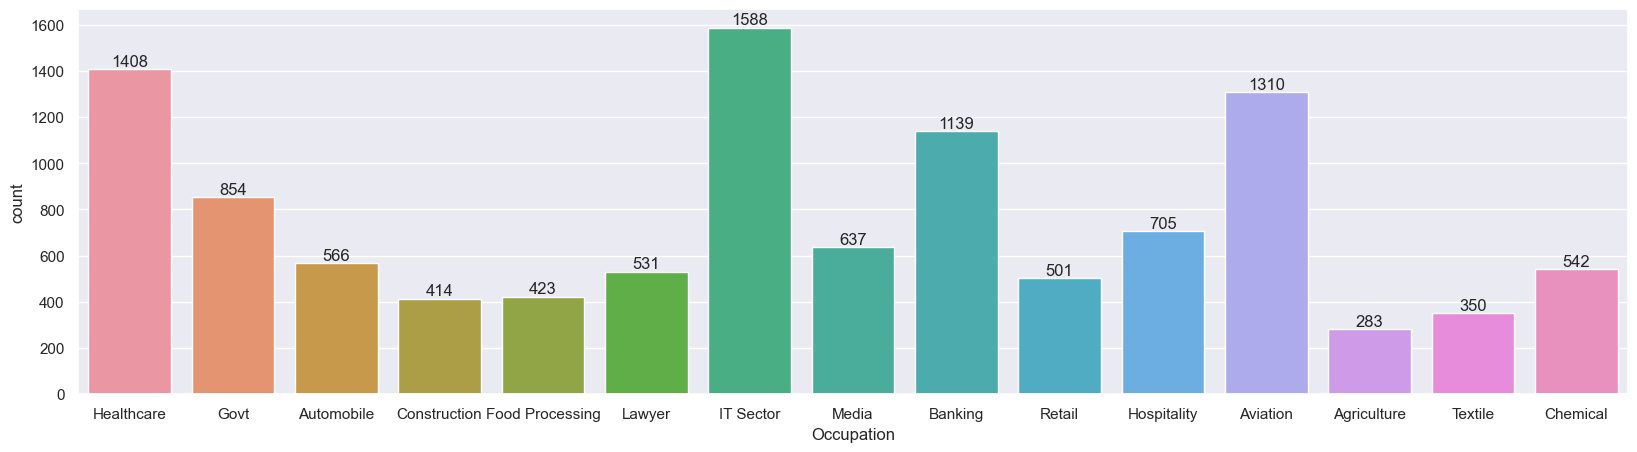

In [50]:
sns.set(rc={'figure.figsize':(20,5)})
ax= sns.countplot(data= df, x= 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

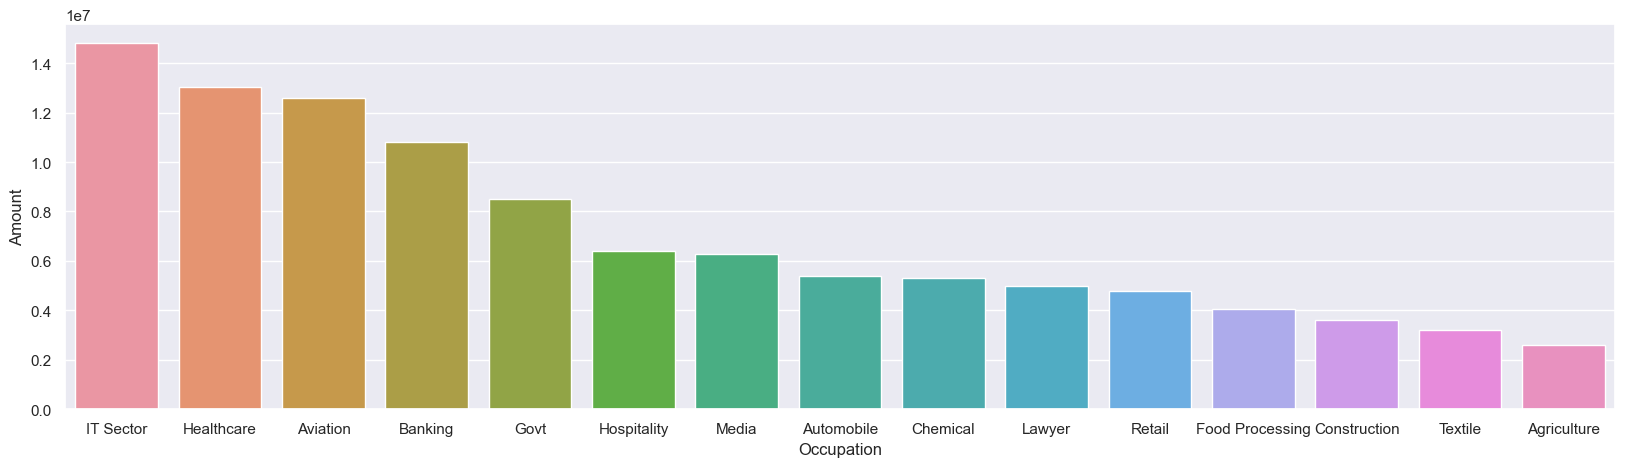

In [51]:
sales_state= df.groupby(['Occupation'], as_index= False)['Amount'].sum().sort_values(by= 'Amount', ascending= False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data= sales_state, x= 'Occupation', y='Amount')

From above graphs we can see that most of the buyers are working in IT, Healthcare & Aviation sector.

PRODUCT CATEGORY

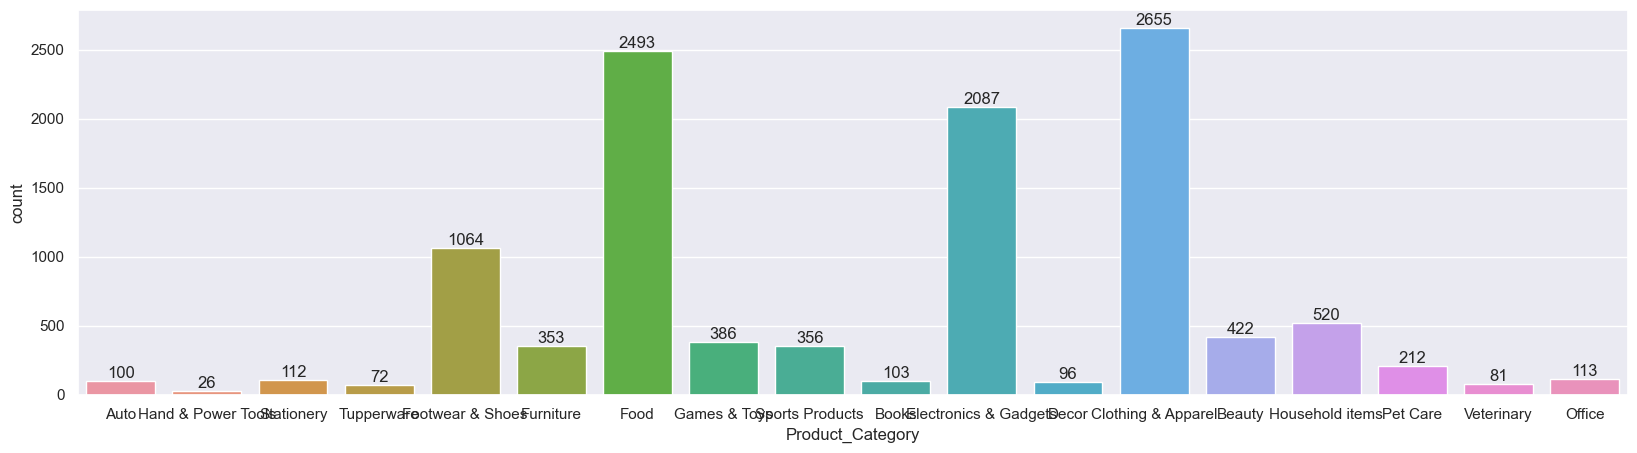

In [52]:
sns.set(rc={'figure.figsize':(20,5)})
ax= sns.countplot(data= df, x= 'Pro')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

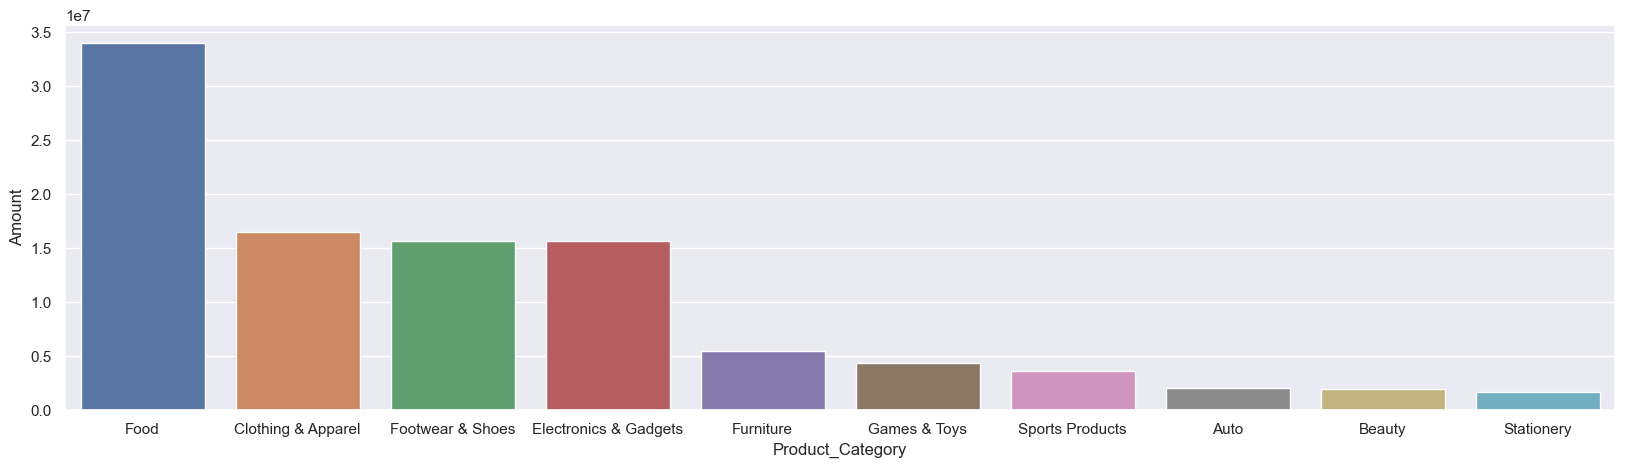

In [53]:
sales_state= df.groupby(['Product_Category'], as_index= False)['Amount'].sum().sort_values(by= 'Amount', ascending= False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data= sales_state, x= 'Product_Category', y='Amount')

From above graphs we can see that most of the sold products are from Food, Clothing & Electronics category.

PRODUCT ID 

<Axes: xlabel='Product_ID', ylabel='Orders'>

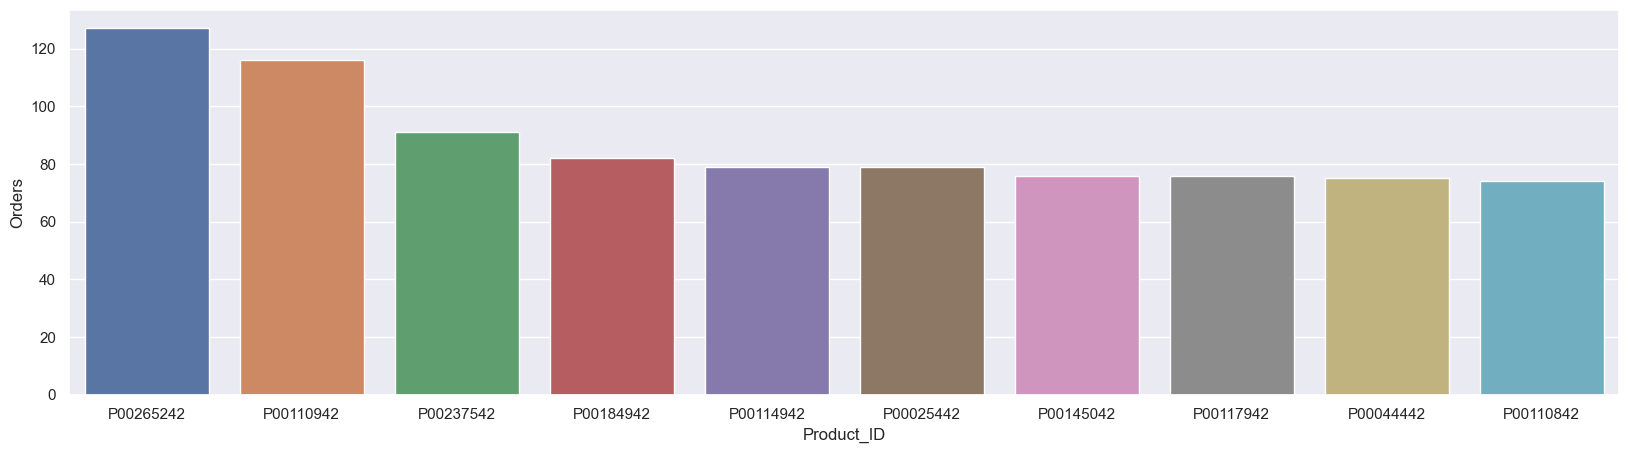

In [55]:
sales_state= df.groupby(['Product_ID'], as_index= False)['Orders'].sum().sort_values(by= 'Orders', ascending= False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data= sales_state, x= 'Product_ID', y='Orders')

<Axes: xlabel='Product_ID', ylabel='Amount'>

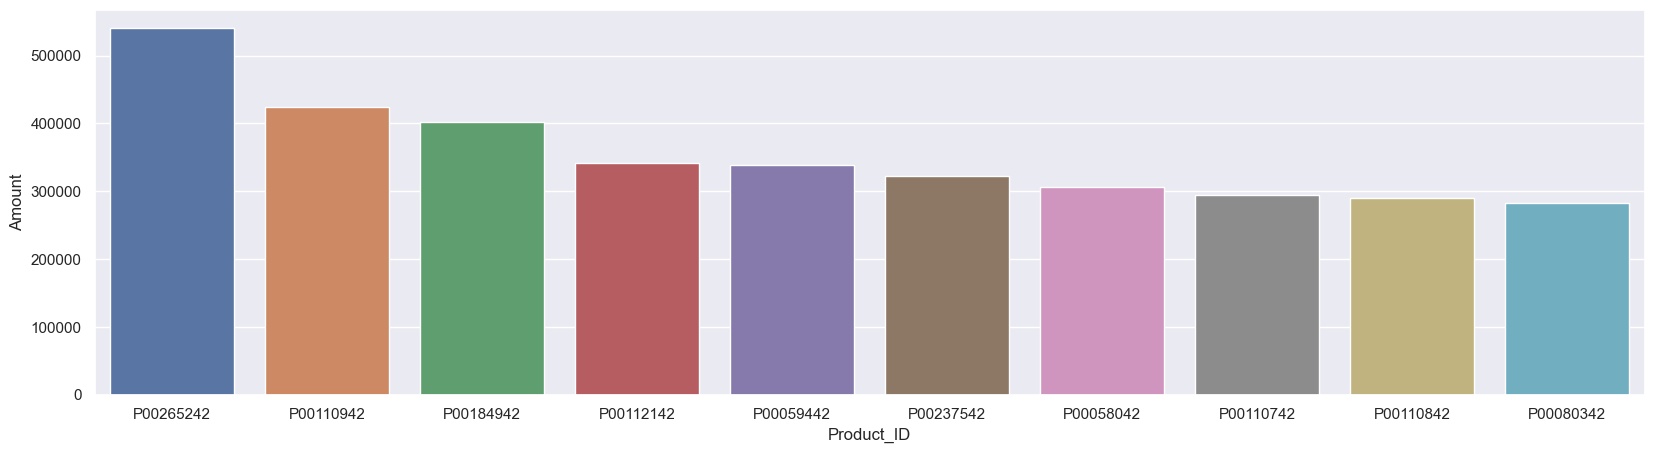

In [56]:
sales_state= df.groupby(['Product_ID'], as_index= False)['Amount'].sum().sort_values(by= 'Amount', ascending= False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data= sales_state, x= 'Product_ID', y='Amount')

From the above graphs we can say that P00265242, P00110942 & P00184942 are the most sold & generating most revenue.

Unmarried & Married women age group of 26-35 yrs from UP, Maharashtra & Karnataka working in IT, Healthcare & Avaiation sector are more likely to buy products from Food, Clothing & Electronics category.